# Problem Statement:

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk

# # nltk.download('vader_lexicon')
# # nltk.download('punkt')
# # nltk.download('stopwords')

In [3]:
data = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
data.drop(['Unnamed: 0'], inplace= True, axis= 1)

In [6]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


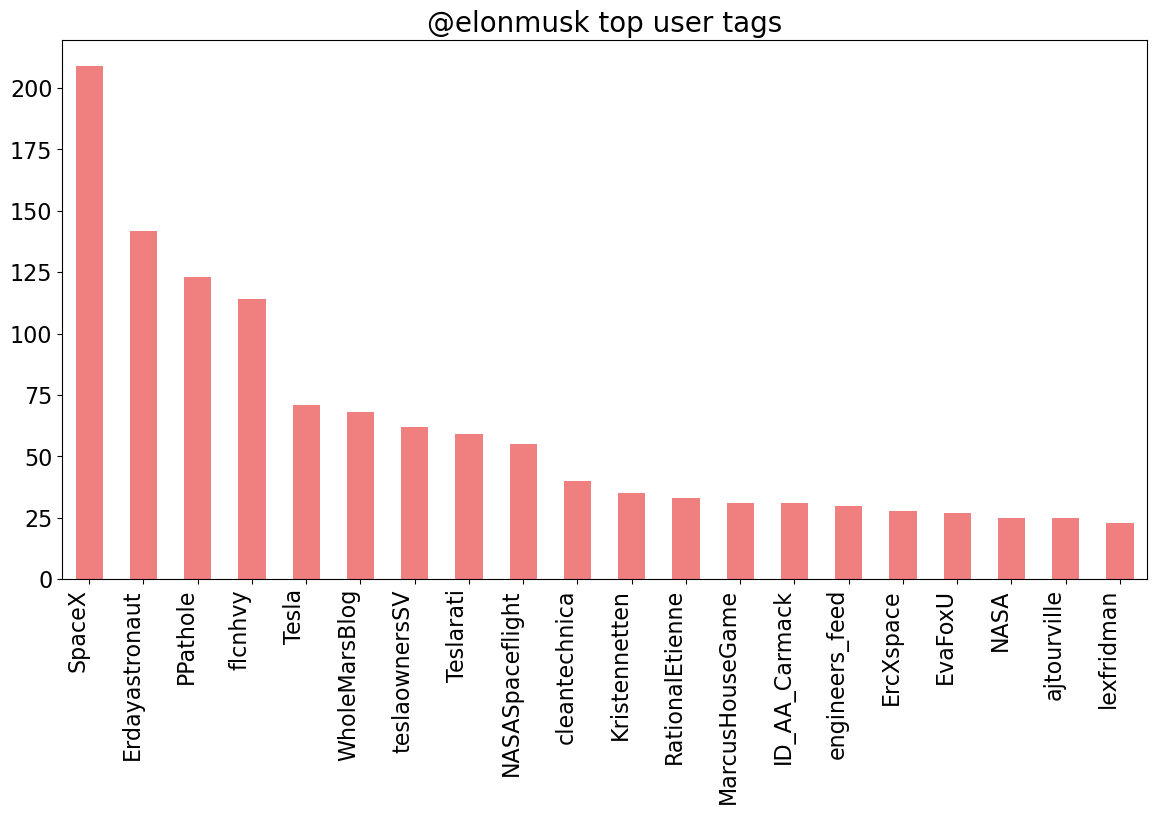

In [7]:
import itertools

c = list(itertools.chain(*data.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [8]:
data['Cleaned_Text'] = data['Text'].apply(lambda text: ' '.join([word for word in word_tokenize(text.lower()) if word.isalpha()]))

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stop_words]))

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Cleaned_Text'])

In [12]:
# Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])
data['Sentiment_Label'] = data['Sentiment'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [13]:
# Train a simple Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment_Label'], test_size=0.2, random_state=42)

In [14]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


# Logistic Regression classifier

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

In [18]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg, target_names=['Positive', 'Negative', 'Neutral'])

In [19]:
print("Logistic Regression Classifier")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(report_logreg)

Logistic Regression Classifier
Accuracy: 0.76
              precision    recall  f1-score   support

    Positive       0.64      0.17      0.27        41
    Negative       0.69      0.93      0.79       176
     Neutral       0.86      0.73      0.79       183

    accuracy                           0.76       400
   macro avg       0.73      0.61      0.62       400
weighted avg       0.77      0.76      0.74       400



# SVM classifier

In [20]:
from sklearn.svm import SVC

In [21]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [22]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=['Positive', 'Negative', 'Neutral'])

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print("Support Vector Machine (SVM) Classifier")
print(f"Accuracy: {accuracy_svm:.2f}")
print(report_svm)

Support Vector Machine (SVM) Classifier
Accuracy: 0.72
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        41
    Negative       0.72      0.82      0.77       176
     Neutral       0.72      0.79      0.75       183

    accuracy                           0.72       400
   macro avg       0.48      0.54      0.51       400
weighted avg       0.65      0.72      0.68       400



# Decision Tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [26]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=['Positive', 'Negative', 'Neutral'])

In [27]:
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt:.2f}")
print(report_dt)

Decision Tree Classifier
Accuracy: 0.79
              precision    recall  f1-score   support

    Positive       0.52      0.32      0.39        41
    Negative       0.75      0.91      0.82       176
     Neutral       0.89      0.77      0.82       183

    accuracy                           0.79       400
   macro avg       0.72      0.67      0.68       400
weighted avg       0.79      0.79      0.78       400



# Random Forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [30]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=['Positive', 'Negative', 'Neutral'])

In [31]:
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")
print(report_rf)

Random Forest Classifier
Accuracy: 0.75
              precision    recall  f1-score   support

    Positive       0.80      0.10      0.17        41
    Negative       0.66      0.97      0.78       176
     Neutral       0.93      0.68      0.79       183

    accuracy                           0.75       400
   macro avg       0.79      0.58      0.58       400
weighted avg       0.79      0.75      0.72       400



In [32]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,000,6,0.000273
1,0001f1e6,2,0.000091
2,0001f1e7,1,0.000045
3,0001f1e8,2,0.000091
4,0001f1e9,4,0.000182
5,0001f1ea,4,0.000182
6,0001f1f4,1,0.000045
7,0001f1f8,1,0.000045
8,0001f1fa,1,0.000045
9,0001f30e,1,0.000045


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,000,0001f1e9,0001f1ea,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4af,0001f525,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.354775,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845719,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### N-gram

### Bi-gram

In [34]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,https co,653
1,rt spacex,71
2,will be,51
3,of the,47
4,this is,36
5,in the,36
6,0001f923 0001f923,35
7,to the,28
8,to be,28
9,we re,26


## Bi-gram plot

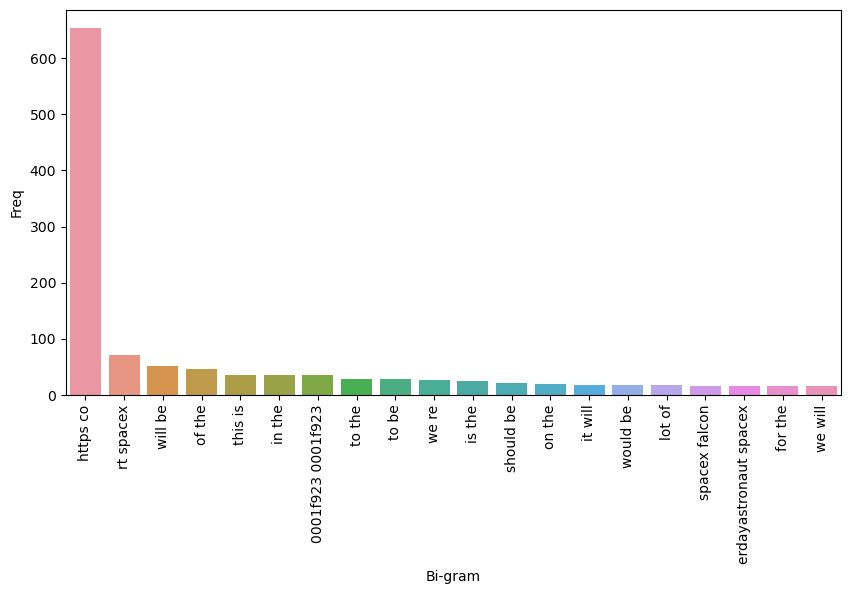

In [36]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Tri-gram

In [37]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
top3_words = get_top_n3_words(data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the space_station,9
3,it will be,8
4,spacex falcon first,8
5,it https co,8
6,thesheetztweetz waemd spacex,8
7,jgrano305 teslaratiteam teslarati,8
8,to https co,7
9,of course still,7


### Tri-gram plot

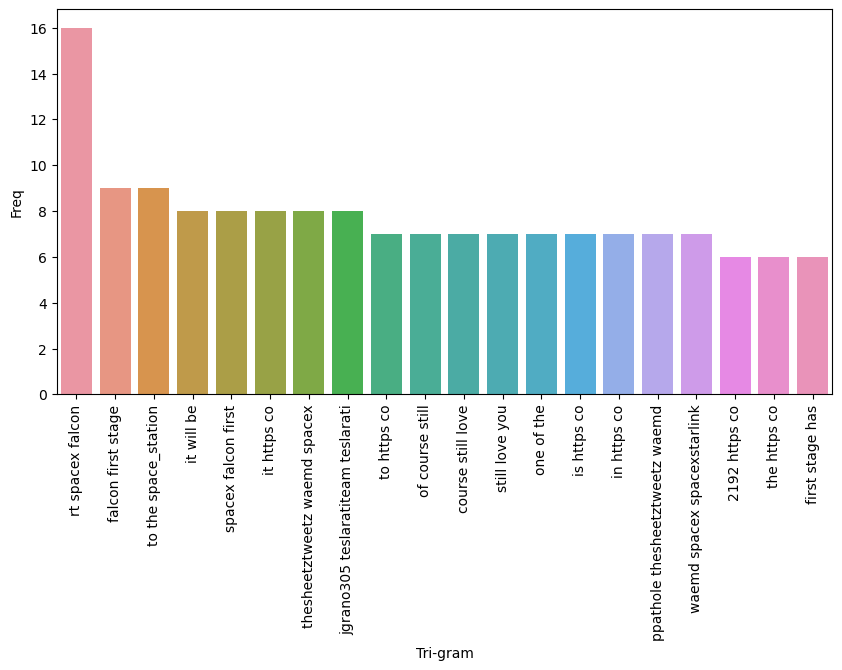

In [39]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating a Worlcloud

In [40]:
string_Total = " ".join(data["Text"])

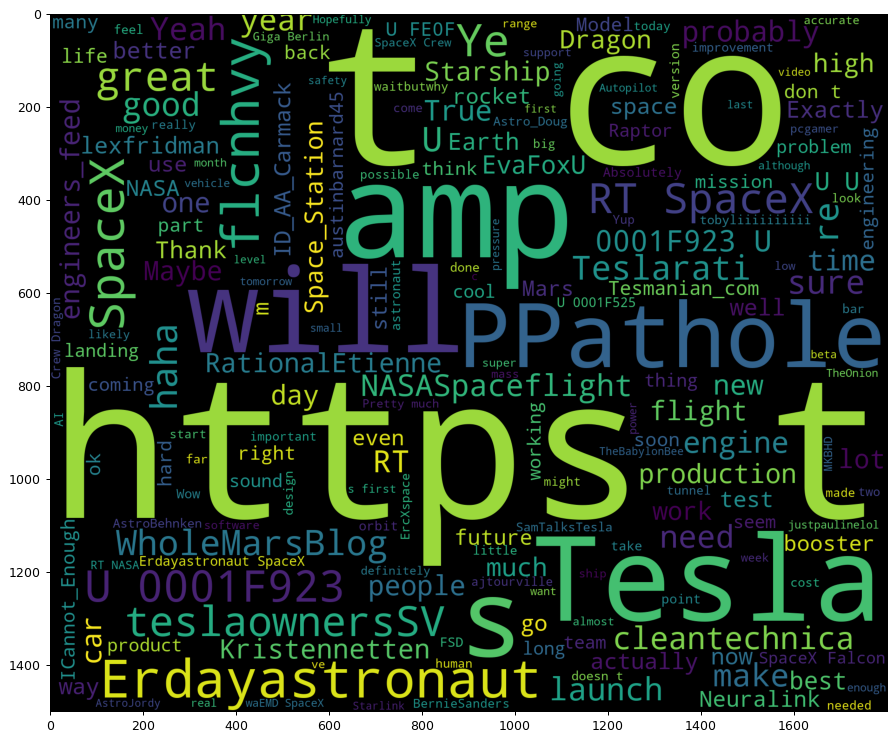

In [41]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Subjectivity and Polarity

In [42]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data.head(11)

,Text,Cleaned_Text,Sentiment,Sentiment_Label,subjectivity,polarity
0,@kunalb11 Im an alien,alien,0.0000,Neutral,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr tried,0.0000,Neutral,0.000000,0.000000
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.6588,Positive,0.750000,1.000000
3,@gtera27 Doge is underestimated,doge underestimated,-0.2732,Negative,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,0.8513,Positive,0.366667,0.345313
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year ox https,0.6114,Positive,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdoge thought would fail https,-0.5423,Negative,0.400000,0.000000
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),flcnhvy haha thanks,0.8360,Positive,0.500000,0.300000
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy indeed tweets definitely represent tim...,0.4574,Positive,0.500000,0.000000
9,The most entertaining outcome is the most likely,entertaining outcome likely,0.4927,Positive,0.675000,0.375000


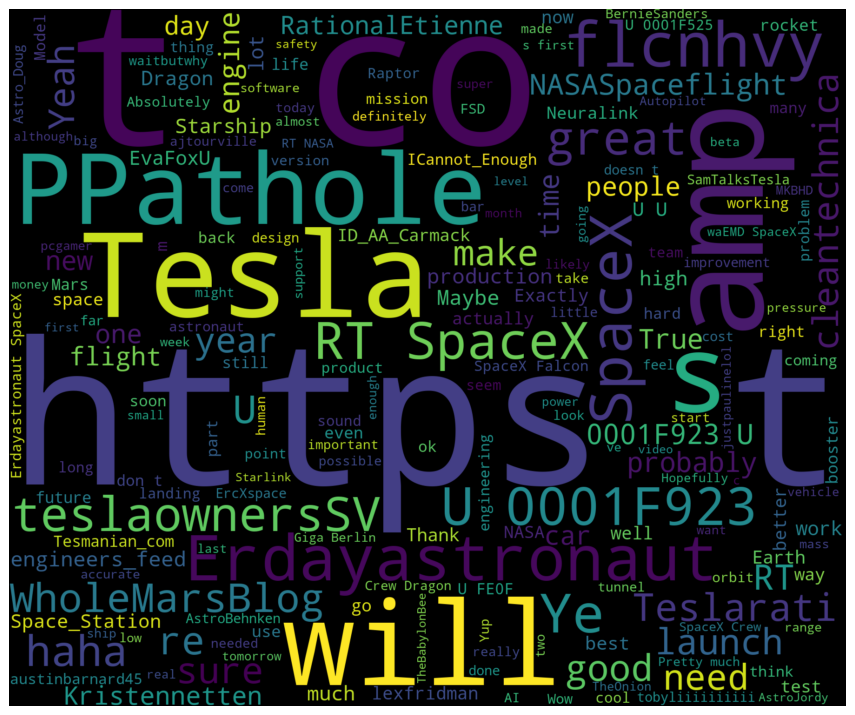

In [43]:
allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [44]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [45]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)

In [46]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -@joerogan @Spotify Great interview!
 -@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! https://t.co/9WFKMYu2oj
 -@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 -@kunalb11 Im an alien
 -@freewalletorg Your app sucks
 -@RationalEtienne @Adamklotz_ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don https://t.co/9Z8Ac6skqx
 -@RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or https://t.co/7J1c92hdjl
 -@SRuhle Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


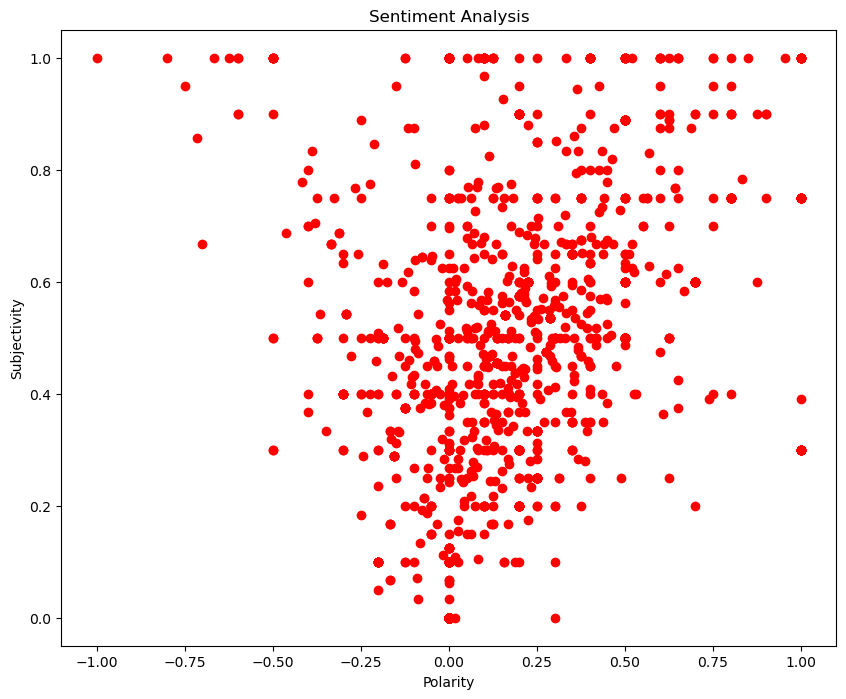

In [47]:
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [48]:
(len(positive_tweets) / len(negative_tweets))*100

408.7962962962963